import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline


In [40]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [41]:
startup = pd.read_csv(r"C:\Users\Pratiksha\OneDrive\Desktop\python code ML\ML\Startups.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

startup.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
startup.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
startup.drop("State",axis=1)

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


<AxesSubplot:>

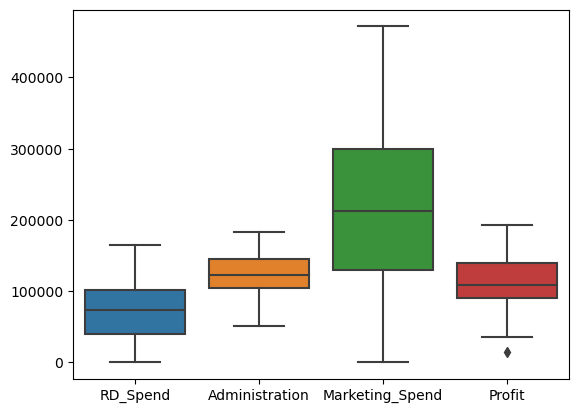

In [45]:
sns.boxplot(data=startup)

# treament on outlier

In [46]:
q1=startup['Profit'].quantile(0.25)
q3=startup['Profit'].quantile(0.75)
iqr=q3-q1

lower_limit=q1-1.5*iqr
lower_limit

15698.290000000023

In [47]:
startup['Profit']=np.where(startup['Profit']<lower_limit,lower_limit,startup["Profit"])

<AxesSubplot:>

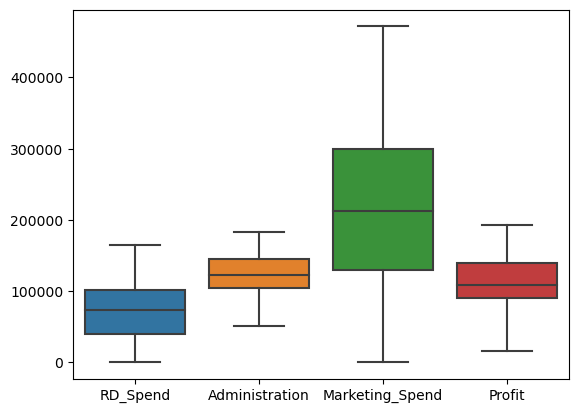

In [48]:
sns.boxplot(data=startup)

In [49]:
startup.isnull().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

## Data partitions

## The data partions into train and test data

In [50]:
x=startup.drop('Profit',axis=1)

y=startup[['Profit']]

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x, y , train_size=0.7,random_state=100)

In [51]:
df= pd.concat([y_train,x_train],axis=1)
df.head()

,Profit,RD_Spend,Administration,Marketing_Spend,State
25,107404.34,64664.71,139553.16,137962.62,California
26,105733.54,75328.87,144135.98,134050.07,Florida
35,96479.51,46014.02,85047.44,205517.64,New York
17,125370.37,94657.16,145077.58,282574.31,New York
7,155752.60,130298.13,145530.06,323876.68,Florida


# Correletion matrix

In [52]:
df.corr()

,Profit,RD_Spend,Administration,Marketing_Spend
Profit,1.000000,0.979801,0.190953,0.723772
RD_Spend,0.979801,1.000000,0.216762,0.696969
Administration,0.190953,0.216762,1.000000,0.003512
Marketing_Spend,0.723772,0.696969,0.003512,1.000000


<AxesSubplot:>

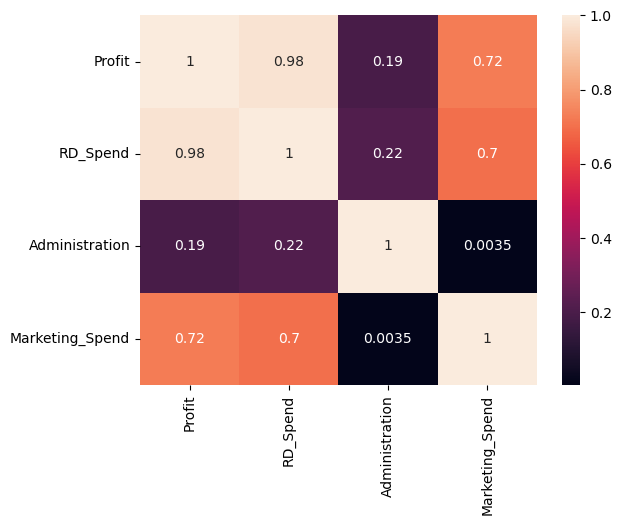

In [53]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'profit vs R&D _spend'}, xlabel='Profit', ylabel='RD_Spend'>

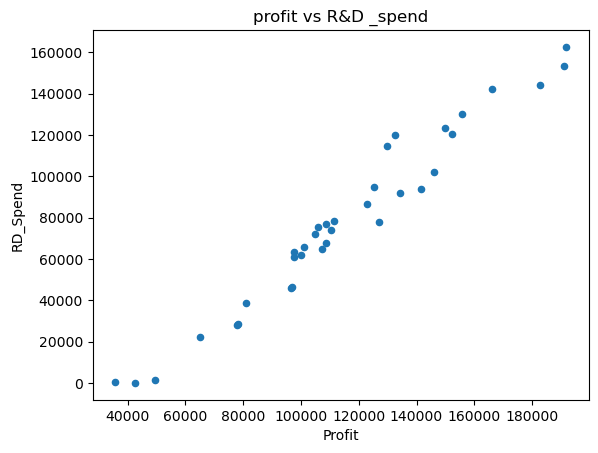

In [54]:
df.plot.scatter(x='Profit', y='RD_Spend', title='profit vs R&D _spend')

<AxesSubplot:title={'center':'profit vs Marketing'}, xlabel='Profit', ylabel='Marketing_Spend'>

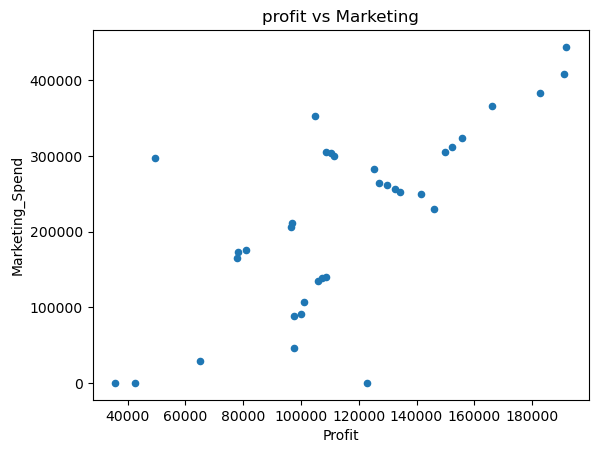

In [55]:
df.plot.scatter(x='Profit',y="Marketing_Spend",title="profit vs Marketing")

 ### R&D_Spend	 have  97% and  Marketing_Spend have 72% strong  positive correletion with profit
 
 * Marketing spend and Rand D are high impact on profit
 * There is no colinearity in data so every plform are independent

In [56]:
X1=df.drop(['Profit','State'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

RD_Spend           9.170466
Administration     4.703923
Marketing_Spend    7.787623
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

*  H0 :- There is no Linear relationship between Profit and R&D_Spend , Administration & Marketing_Spend

* Vs 

*  H1 :- There is Linear relationship between Profit and R&D_Spend , Administration & Marketing_Spend

Alpha = 0.05 (5%)

In [57]:
import statsmodels.formula.api as smf
model=smf.ols("Profit ~ RD_Spend  + Administration + Marketing_Spend",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     271.7
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           2.46e-22
Time:                        11:35:41   Log-Likelihood:                -360.81
No. Observations:                  35   AIC:                             729.6
Df Residuals:                      31   BIC:                             735.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.709e+04   6963.527      6.762      0.000    3.29e+04    6.13e+04
RD_Spend            0.8285      0.045     18.490      0.000       0.737       0.920
Administration     -0.0158      0.053     -0.296      0.769      -0.125       0.093
Marketing_Spend     0.0242      0.016      1.559      0.129      -0.007       0.056
==============================================================================
Omnibus:                        1.027   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.818
Skew:                          -0.363   Prob(JB):                        0.664
Kurtosis:                       2.818   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
import statsmodels.formula.api as smf
model=smf.ols("Profit ~ RD_Spend",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     792.2
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.20e-24
Time:                        11:36:56   Log-Likelihood:                -362.34
No. Observations:                  35   AIC:                             728.7
Df Residuals:                      33   BIC:                             731.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.682e+04   2758.990     16.971      0.000    4.12e+04    5.24e+04
RD_Spend       0.8739      0.031     28.147      0.000       0.811       0.937
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   2.584
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.682
Skew:                          -0.341   Prob(JB):                        0.711
Kurtosis:                       2.939   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* There is Linear relationship between sales and RD_spend
* 96% is accuracy of model , so we say model is good fit 
* Y = 4.682 +0.8736 * RD_spend 

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [59]:
df.head()

,Profit,RD_Spend,Administration,Marketing_Spend,State
25,107404.34,64664.71,139553.16,137962.62,California
26,105733.54,75328.87,144135.98,134050.07,Florida
35,96479.51,46014.02,85047.44,205517.64,New York
17,125370.37,94657.16,145077.58,282574.31,New York
7,155752.60,130298.13,145530.06,323876.68,Florida


In [65]:
# Y = 4.682 +0.8736 * RD_spend
Y = 4.682 +0.8736 * 46014.02 
Y

40202.529872

In [66]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,Profit,RD_Spend,Administration,Marketing_Spend,State,fitted_value,residual
25,107404.34,64664.71,139553.16,137962.62,California,103335.846679,4068.493321
26,105733.54,75328.87,144135.98,134050.07,Florida,112655.599089,-6922.059089
35,96479.51,46014.02,85047.44,205517.64,New York,87036.408835,9443.101165
17,125370.37,94657.16,145077.58,282574.31,New York,129547.213366,-4176.843366
7,155752.60,130298.13,145530.06,323876.68,Florida,160695.003351,-4942.403351


# Linearity

<AxesSubplot:title={'center':'Profit'}, xlabel='RD_Spend', ylabel='Profit'>

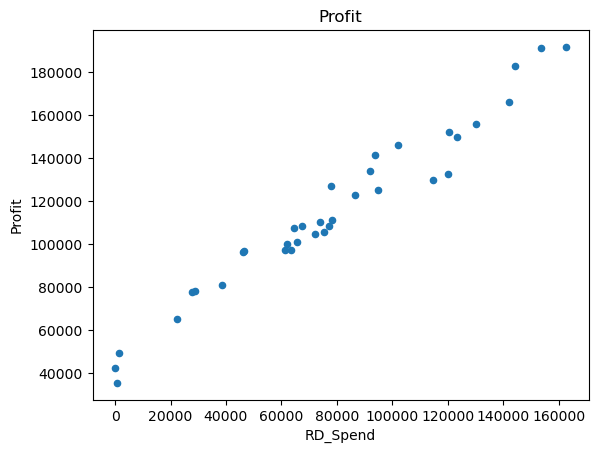

In [69]:
df.plot.scatter(x='RD_Spend', y='Profit', title='Profit')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

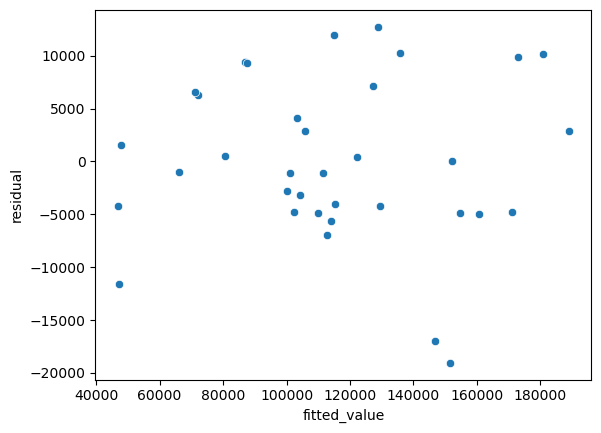

In [71]:
sns.scatterplot(x='fitted_value',y='residual',data=df)

# Normality

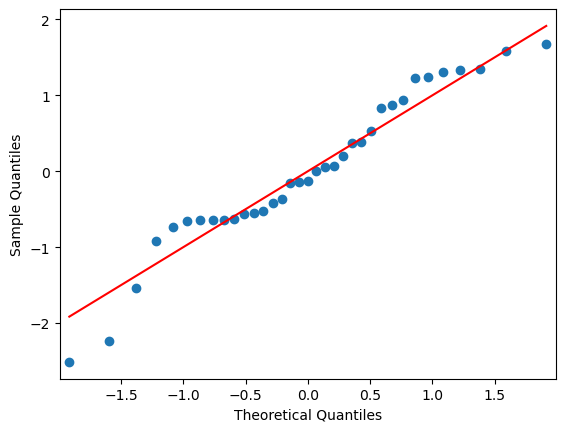

In [72]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

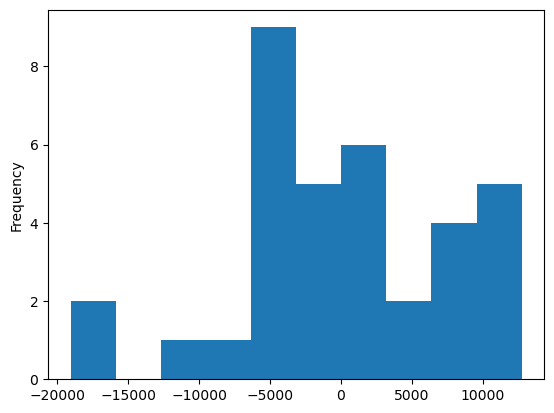

In [73]:
# Model Error are IID 

df['residual'].plot.hist()


# Prediction on Test Data (unseen data)

In [75]:
df_test=pd.concat([x_test,y_test],axis=1)

df_test.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
6,134615.46,147198.87,127716.82,California,156122.51
36,28663.76,127056.21,201126.82,Florida,90708.19
37,44069.95,51283.14,197029.42,California,89949.14
28,66051.52,182645.56,118148.20,Florida,103282.38
43,15505.73,127382.30,35534.17,New York,69758.98


In [77]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,Prediction
6,134615.46,147198.87,127716.82,California,156122.51,164468.056895
36,28663.76,127056.21,201126.82,Florida,90708.19,71873.458594
37,44069.95,51283.14,197029.42,California,89949.14,85337.423536
28,66051.52,182645.56,118148.20,Florida,103282.38,104547.824541
43,15505.73,127382.30,35534.17,New York,69758.98,60374.232982


# Test

In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Profit, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.92


# Train

In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Profit, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.96


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Finish...